In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("AbandonoEmpleados.csv", sep=';', index_col= 'id',na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [4]:
#Ver datos faltantes en df
df.isnull().sum().sort_values(ascending=False).head(10)

anos_en_puesto             1238
conciliacion               1011
sexo                        199
educacion                   101
satisfaccion_trabajo         76
implicacion                  18
edad                          0
nivel_acciones                0
evaluacion                    0
satisfaccion_companeros       0
dtype: int64

Columna 'anos_en_puesto' y 'conciliacion' tiene gran cantidad de nulos, se elimina
Columna 'sexo','educacion','satisfaccion_trabajo' e 'implicacion' le faltan pocos datos, se imputaran

In [5]:
df.drop(columns = ['anos_en_puesto', 'conciliacion'], inplace = True)

In [6]:
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2


## EDA Categorica

In [7]:
#Analisis de Variables categoricas (str)
from math import ceil

#Calculamos el número de filas que necesitamos
def graficos_categorica(graf_cat):
    filas = ceil(graf_cat.shape[1]/2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows= filas, ncols=2, figsize = (18, filas * 6))
    
    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Bucle que añade gráficos
    for graf, nombreColum in enumerate(graf_cat):
        graf_cat[nombreColum].value_counts().plot.barh(ax = ax[graf])
        ax[graf].set_title(nombreColum, fontsize = 12, fontweight = "bold")
        ax[graf].tick_params(labelsize = 12)

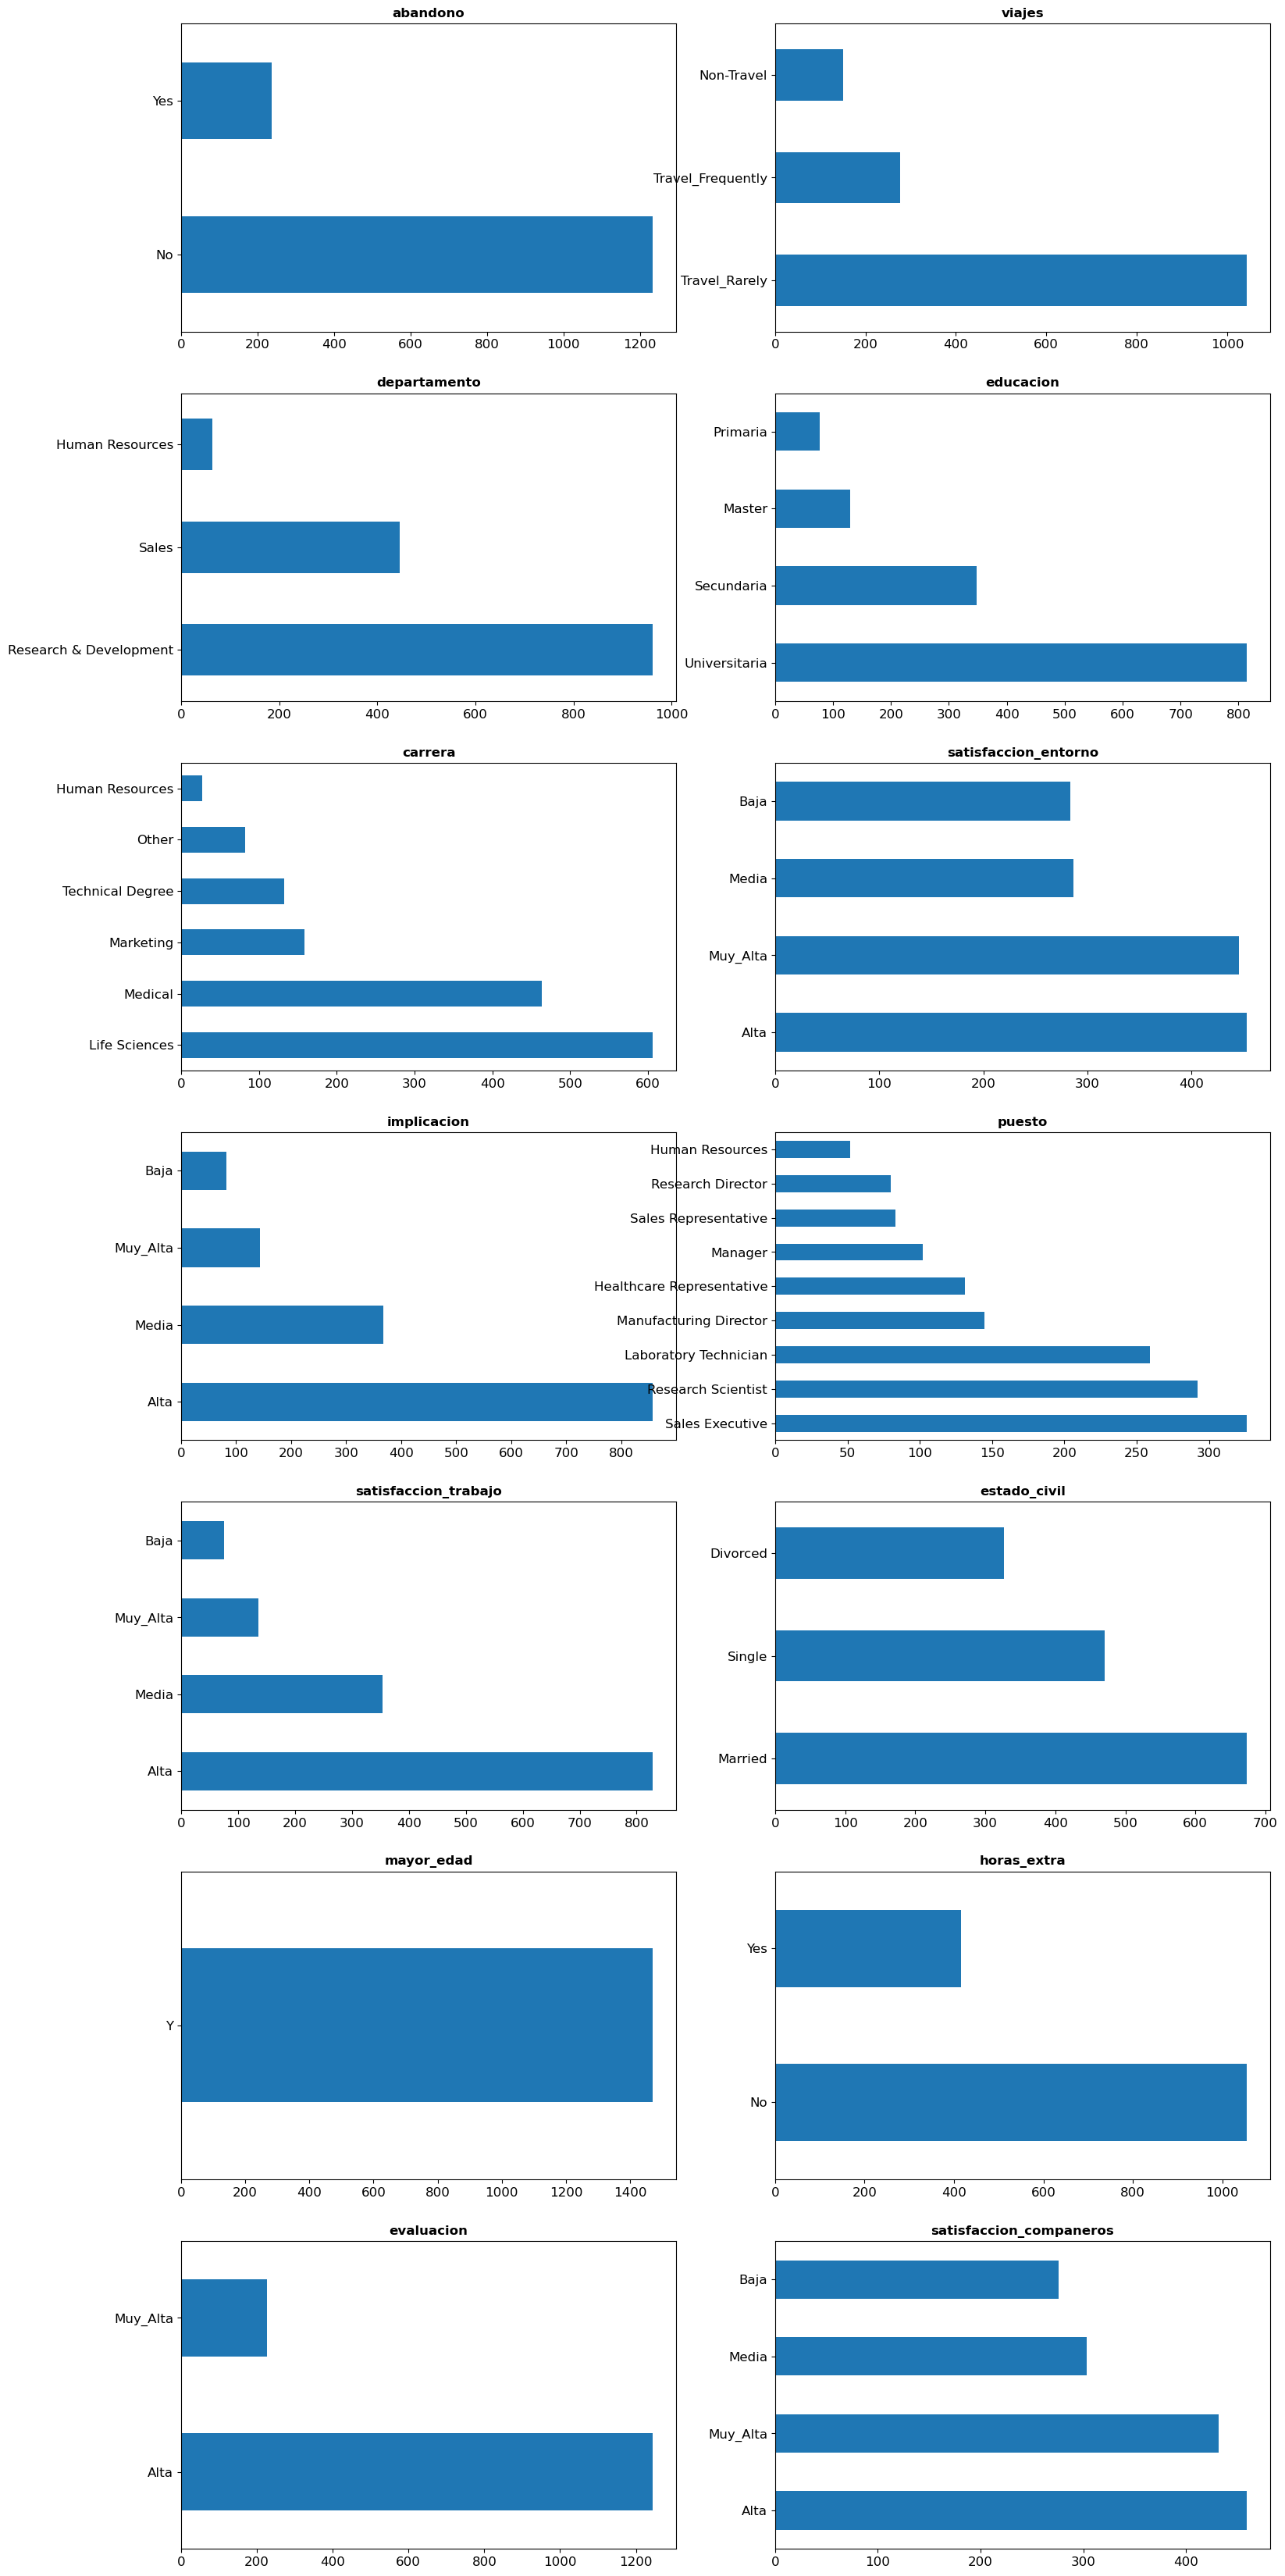

In [8]:
graficos_categorica(df.select_dtypes('object'))

Columna 'mayor_edad' con un solo valor se elimina
Imputar datos:
'sexo'(Numerica)
'educacion'-> Universitaria
'satisfaccion_trabajo'-> Alta
'implicacion'-> Alta

In [9]:
df.drop(columns=['mayor_edad'], inplace=True)

In [10]:
#Imputar datos
df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

## EDA Numerica

In [11]:
#Analisis de Variables categoricas (int y float = number)
def tab_numerica(num):
    #Calculamos describe
    estadisticos = num.describe().T #Cambia x por y
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Lo devolvemos
    return(estadisticos)

In [12]:
tab_numerica(df.select_dtypes('number'))

,count,mean,std,min,25%,50%,75%,max,median
edad,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0,36.0
distancia_casa,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0,7.0
empleados,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,0.720788,1.0,2.0,3.0,3.0,4.0,3.0
nivel_laboral,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0,2.0
salario_mes,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0,4919.0
num_empresas_anteriores,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0,2.0
incremento_salario_porc,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0,14.0
horas_quincena,1470.0,80.000000,0.000000,80.0,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0,1.0


*Mean y median similares = desviacion estandar

Columna 'sexo' tiene hasta 4 valores -> Eliminar
Columna 'empleados' tiene 1 valor -> Eliminar
Columna 'horas_quincena' tiene 1 valor -> Eliminar

In [13]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)

In [14]:
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2


## insights

In [15]:
#Tasa de abandono
df.abandono.value_counts(normalize=True )*100 #normalize = datos en %

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

### Tipo de empleado que se va de la empresa

In [16]:
#Transformar variable categorica a numerica (tiene dos valores)
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

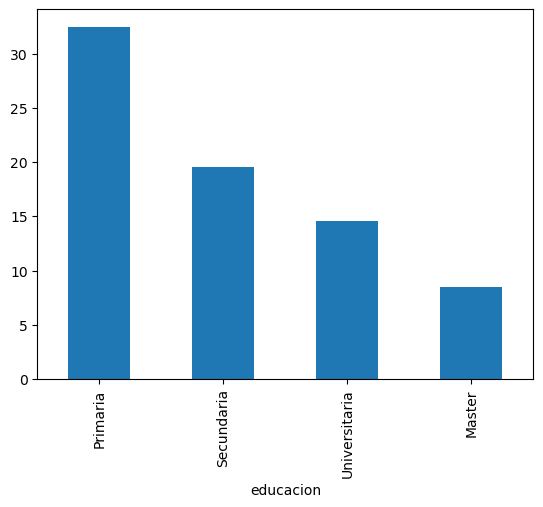

In [17]:
# Analisis, empleados que se van por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100 # resultado en %
temp.plot.bar();

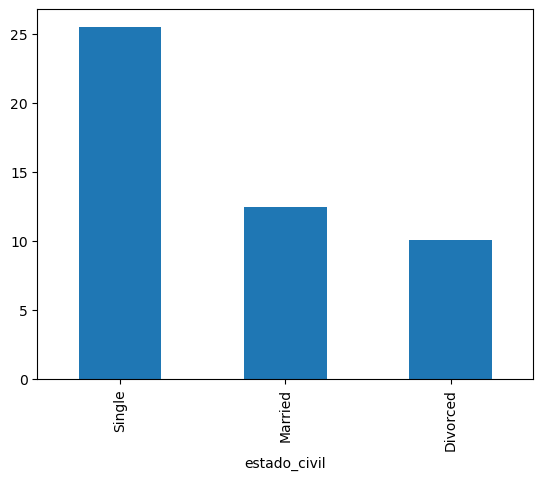

In [18]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) *100
temp.plot.bar();

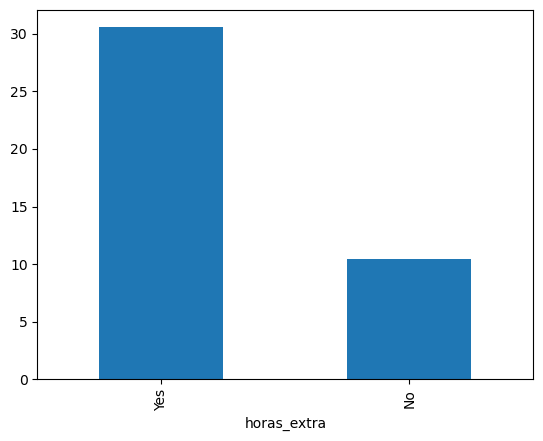

In [19]:
# Analisis por horas extra
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) *100
temp.plot.bar();

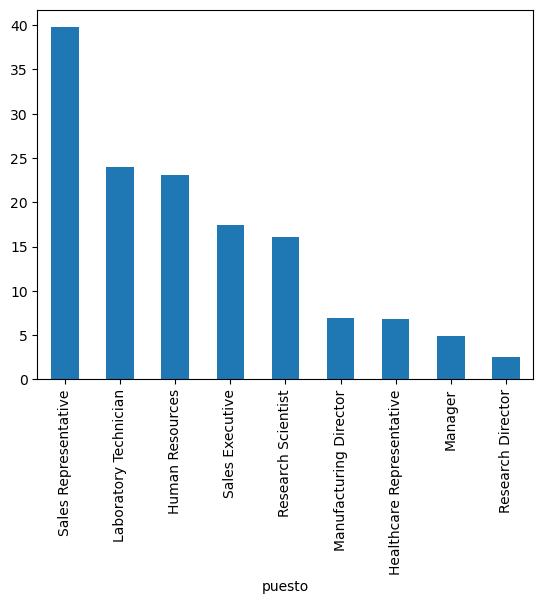

In [20]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

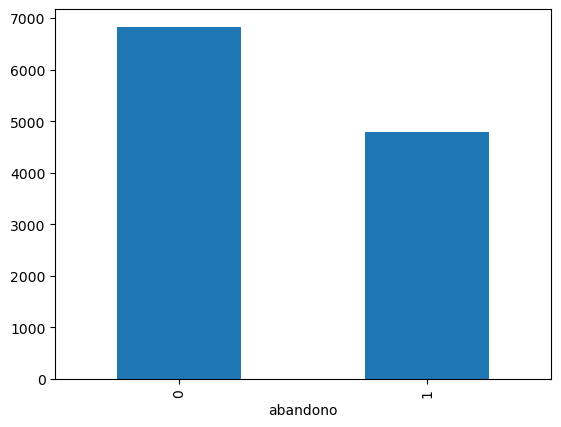

In [21]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();
#1 si, 2 no.    Empleados con menor sueldo se van

### Conclusion
* Baja educacion (Primaria)
* Solteros
* Realizan horas extra
* Puesto de trabajo 'Sales Representative'
* Bajo sueldo

Según el estudio "Cost of Turnover" del Center for American Progress:
Este va en el coste que genera conseguir que otro empleado cumpla con las tareas en la empresa de manera similar al empleado
que abandono

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario
* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario
* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario
* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [22]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']].head()

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616


In [23]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados con % del estudio "Cost of Turnover"
resultados = [df.salario_ano * 0.161,
              df.salario_ano * 0.197,
              df.salario_ano * 0.204, 
              df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados)

df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352


In [24]:
impacto_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
print(f'el coste por abandono de empleados es: ${impacto_total.round()}')

el coste por abandono de empleados es: $2719006.0


In [25]:
impacto_motivacion= df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()
print(f'El coste por abandono debido a la baja motivacion es de: ${impacto_motivacion.round()}')

El coste por abandono debido a la baja motivacion es de: $368673.0


In [26]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(impacto_total * 0.1)}$ cada año.")
print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(impacto_total * 0.2)}$ cada año.")
print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(impacto_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


In [27]:
#% de representantes de ventas que se han ido el año pasado
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative']) #contar
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)]) #abandono =1 se fueron
porcentaje_sales_aband = abandonos_repre_pasado / total_repre_pasado

#abandono el ano pasado
porcentaje_sales_aband

0.39759036144578314

In [28]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)]) #50
se_iran = int(total_repre_actual * porcentaje_sales_aband)

#los 50 que hay en la empresa * porcentaje que se fueron el ano pasado
se_iran

19

In [29]:
retenemos = int(se_iran * 0.3) #suponiendo que retenemos un 30% de los empleados de sales

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porcentaje_sales_aband * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos.round(1)}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.2$.


## Hasta este punto se ha realizado una limpieza de datos y analisis exploratorio del cual se puede extraer mas informacion sobre los puestos y el impacto que este genera a la empresa

# Machine Learning

In [30]:
df_ml = df.copy()
df_ml

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [31]:
from sklearn.preprocessing import OneHotEncoder #libreria para ML, no datos null y todas las variables deben ser numericas
#OneHotEncoder -> Genera variables en 0 y 1 de las variables categoricas
#Categóricas
cat = df_ml.select_dtypes('object')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [32]:
cat_ohe #de una columna pueden generarse varias ramificaciones

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
#Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe
num = df.select_dtypes('number').reset_index(drop = True)

In [34]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


In [35]:
#Prediccion de abandono
x = df_ml.drop(columns='abandono') #Variables predictorias (total-abandono)
y = df_ml['abandono'] #Target

In [36]:
# Separación train y test
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) #70/30 

## ML: Modelo de arbol de deciciones

In [37]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ad = DecisionTreeClassifier(max_depth=4)

#Entrenar
ad.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

In [38]:
# Predicción
pred = ad.predict_proba(test_x)[:, 1] #[]->Prob >0
pred[:20] #20 Primeros empleados
#Probabilidad de abandono de los empleados 0.04%, 45%,etc

array([0.38095238, 0.05623472, 0.10185185, 0.05623472, 0.05623472,
       0.38095238, 0.10185185, 0.09009009, 0.05623472, 0.05623472,
       0.09009009, 0.05623472, 0.2       , 0.05623472, 0.05623472,
       0.38095238, 0.53125   , 0.05623472, 0.10185185, 0.10185185])

In [39]:
# Evaluación
from sklearn.metrics import roc_auc_score

print(f'El acierto del modelo entrenado es del %{roc_auc_score(test_y,pred).round(4)*100}')

El acierto del modelo entrenado es del %69.19


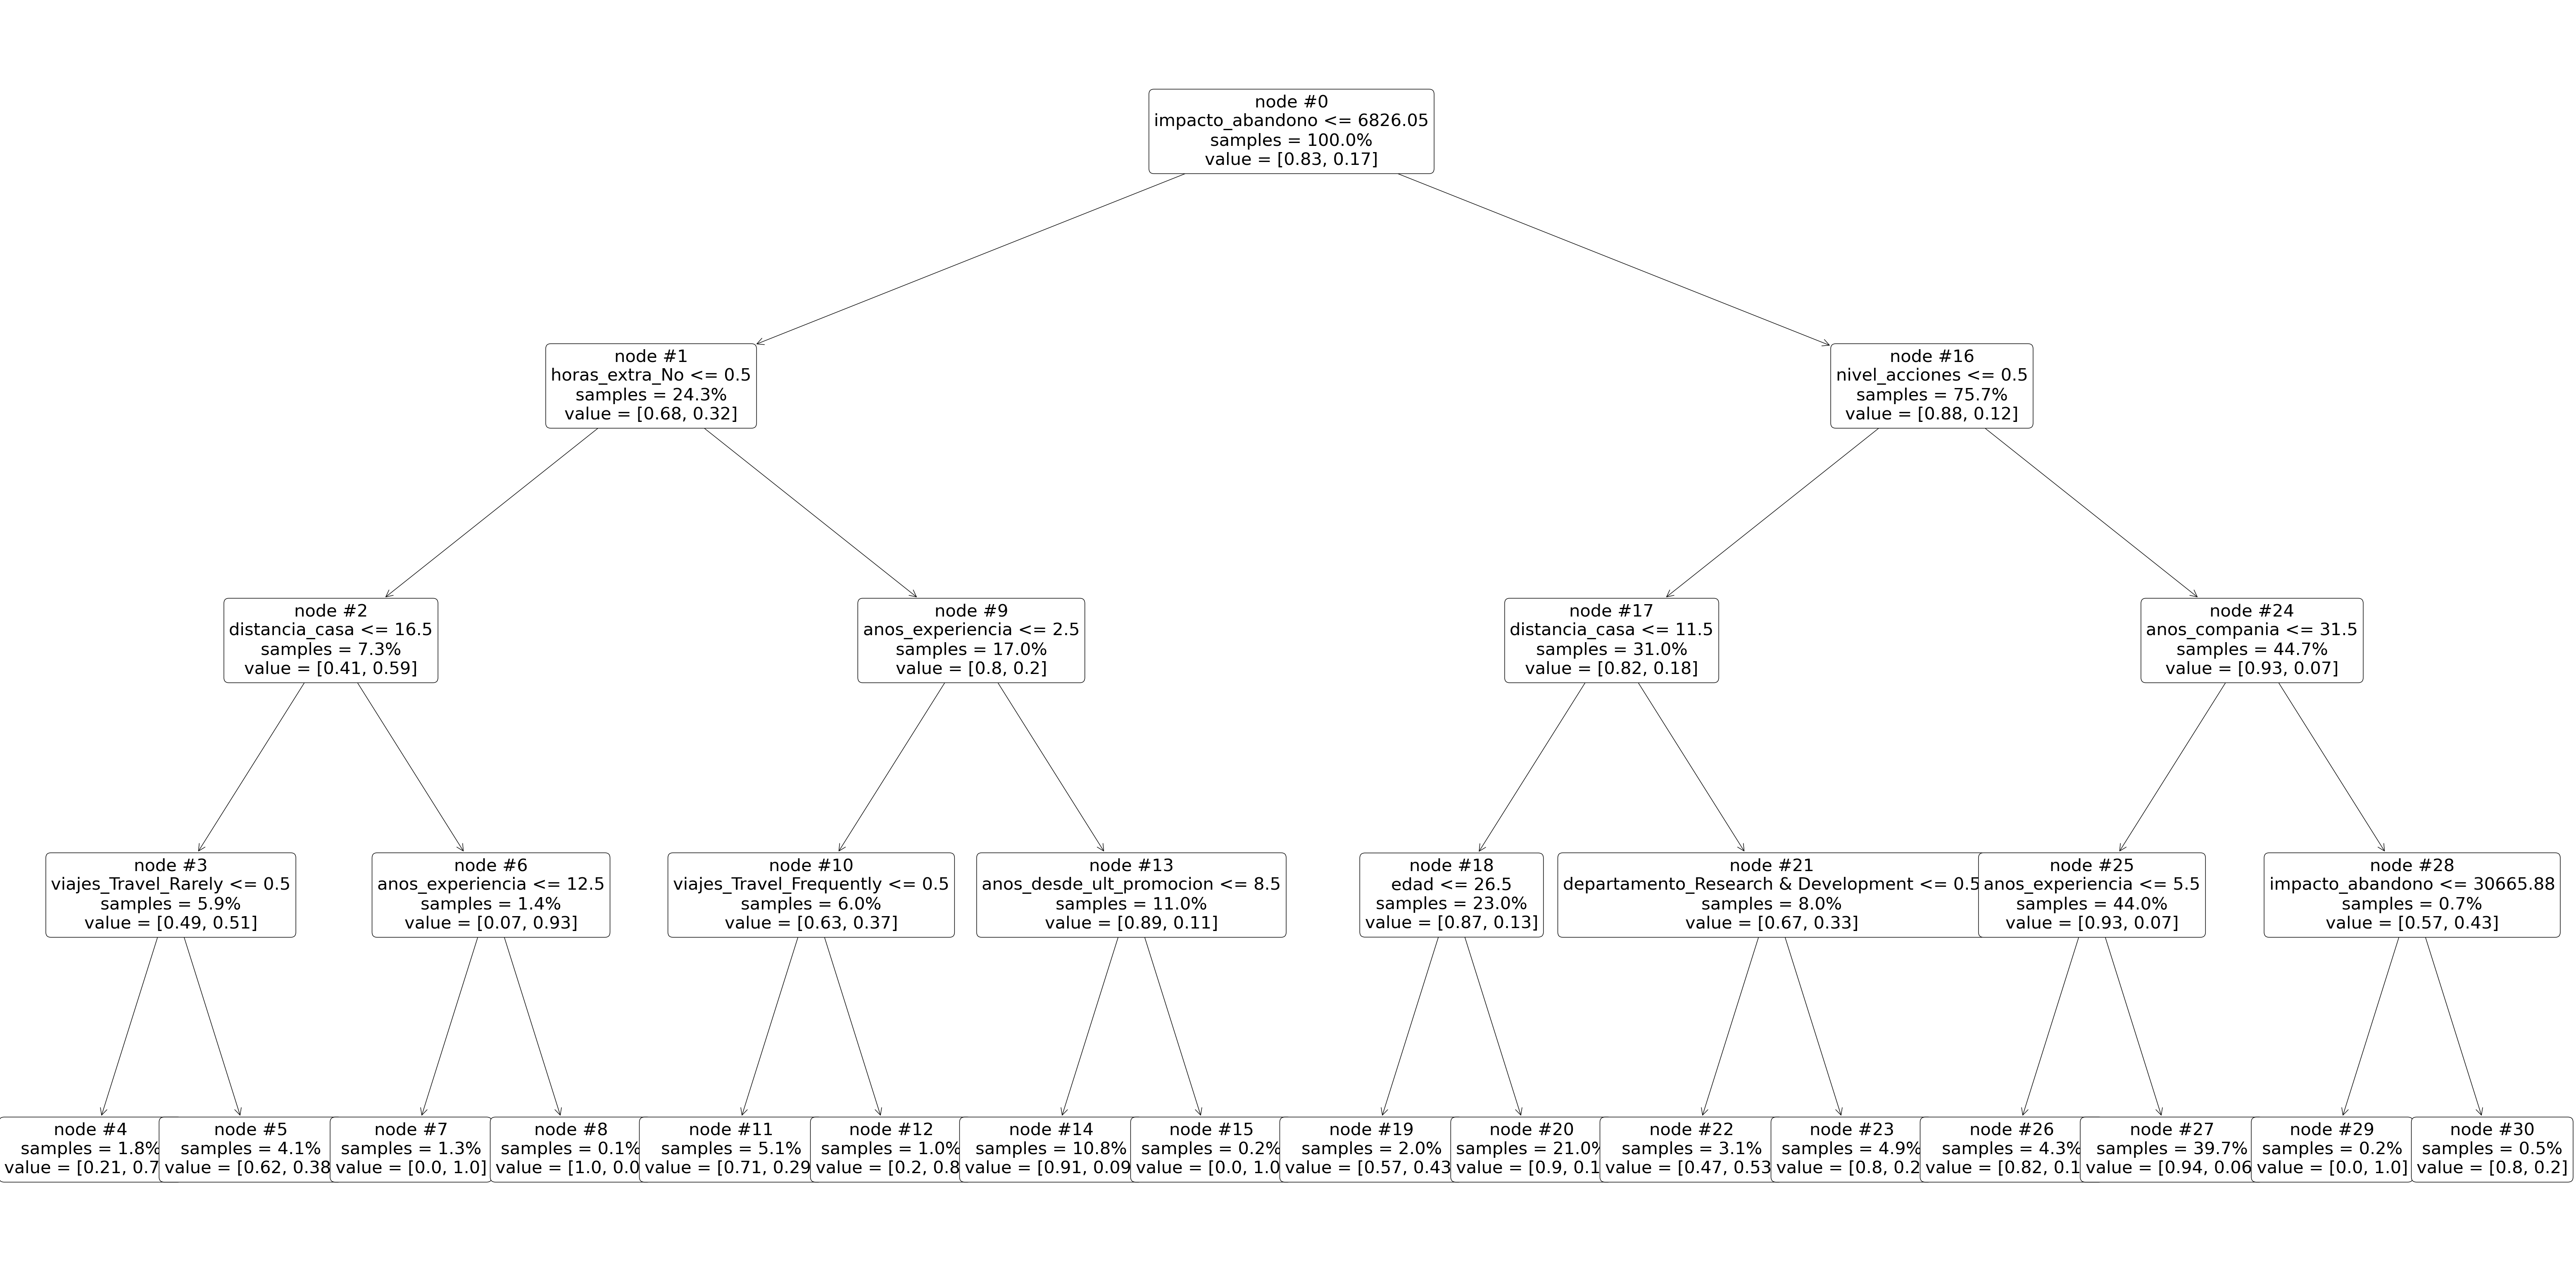

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize = (80,40))
plot_tree(ad,
          feature_names= test_x.columns,
          impurity = False,
          fontsize=30,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);
plt.show()
#izq SI cumple condicion, der NO cumple condicion

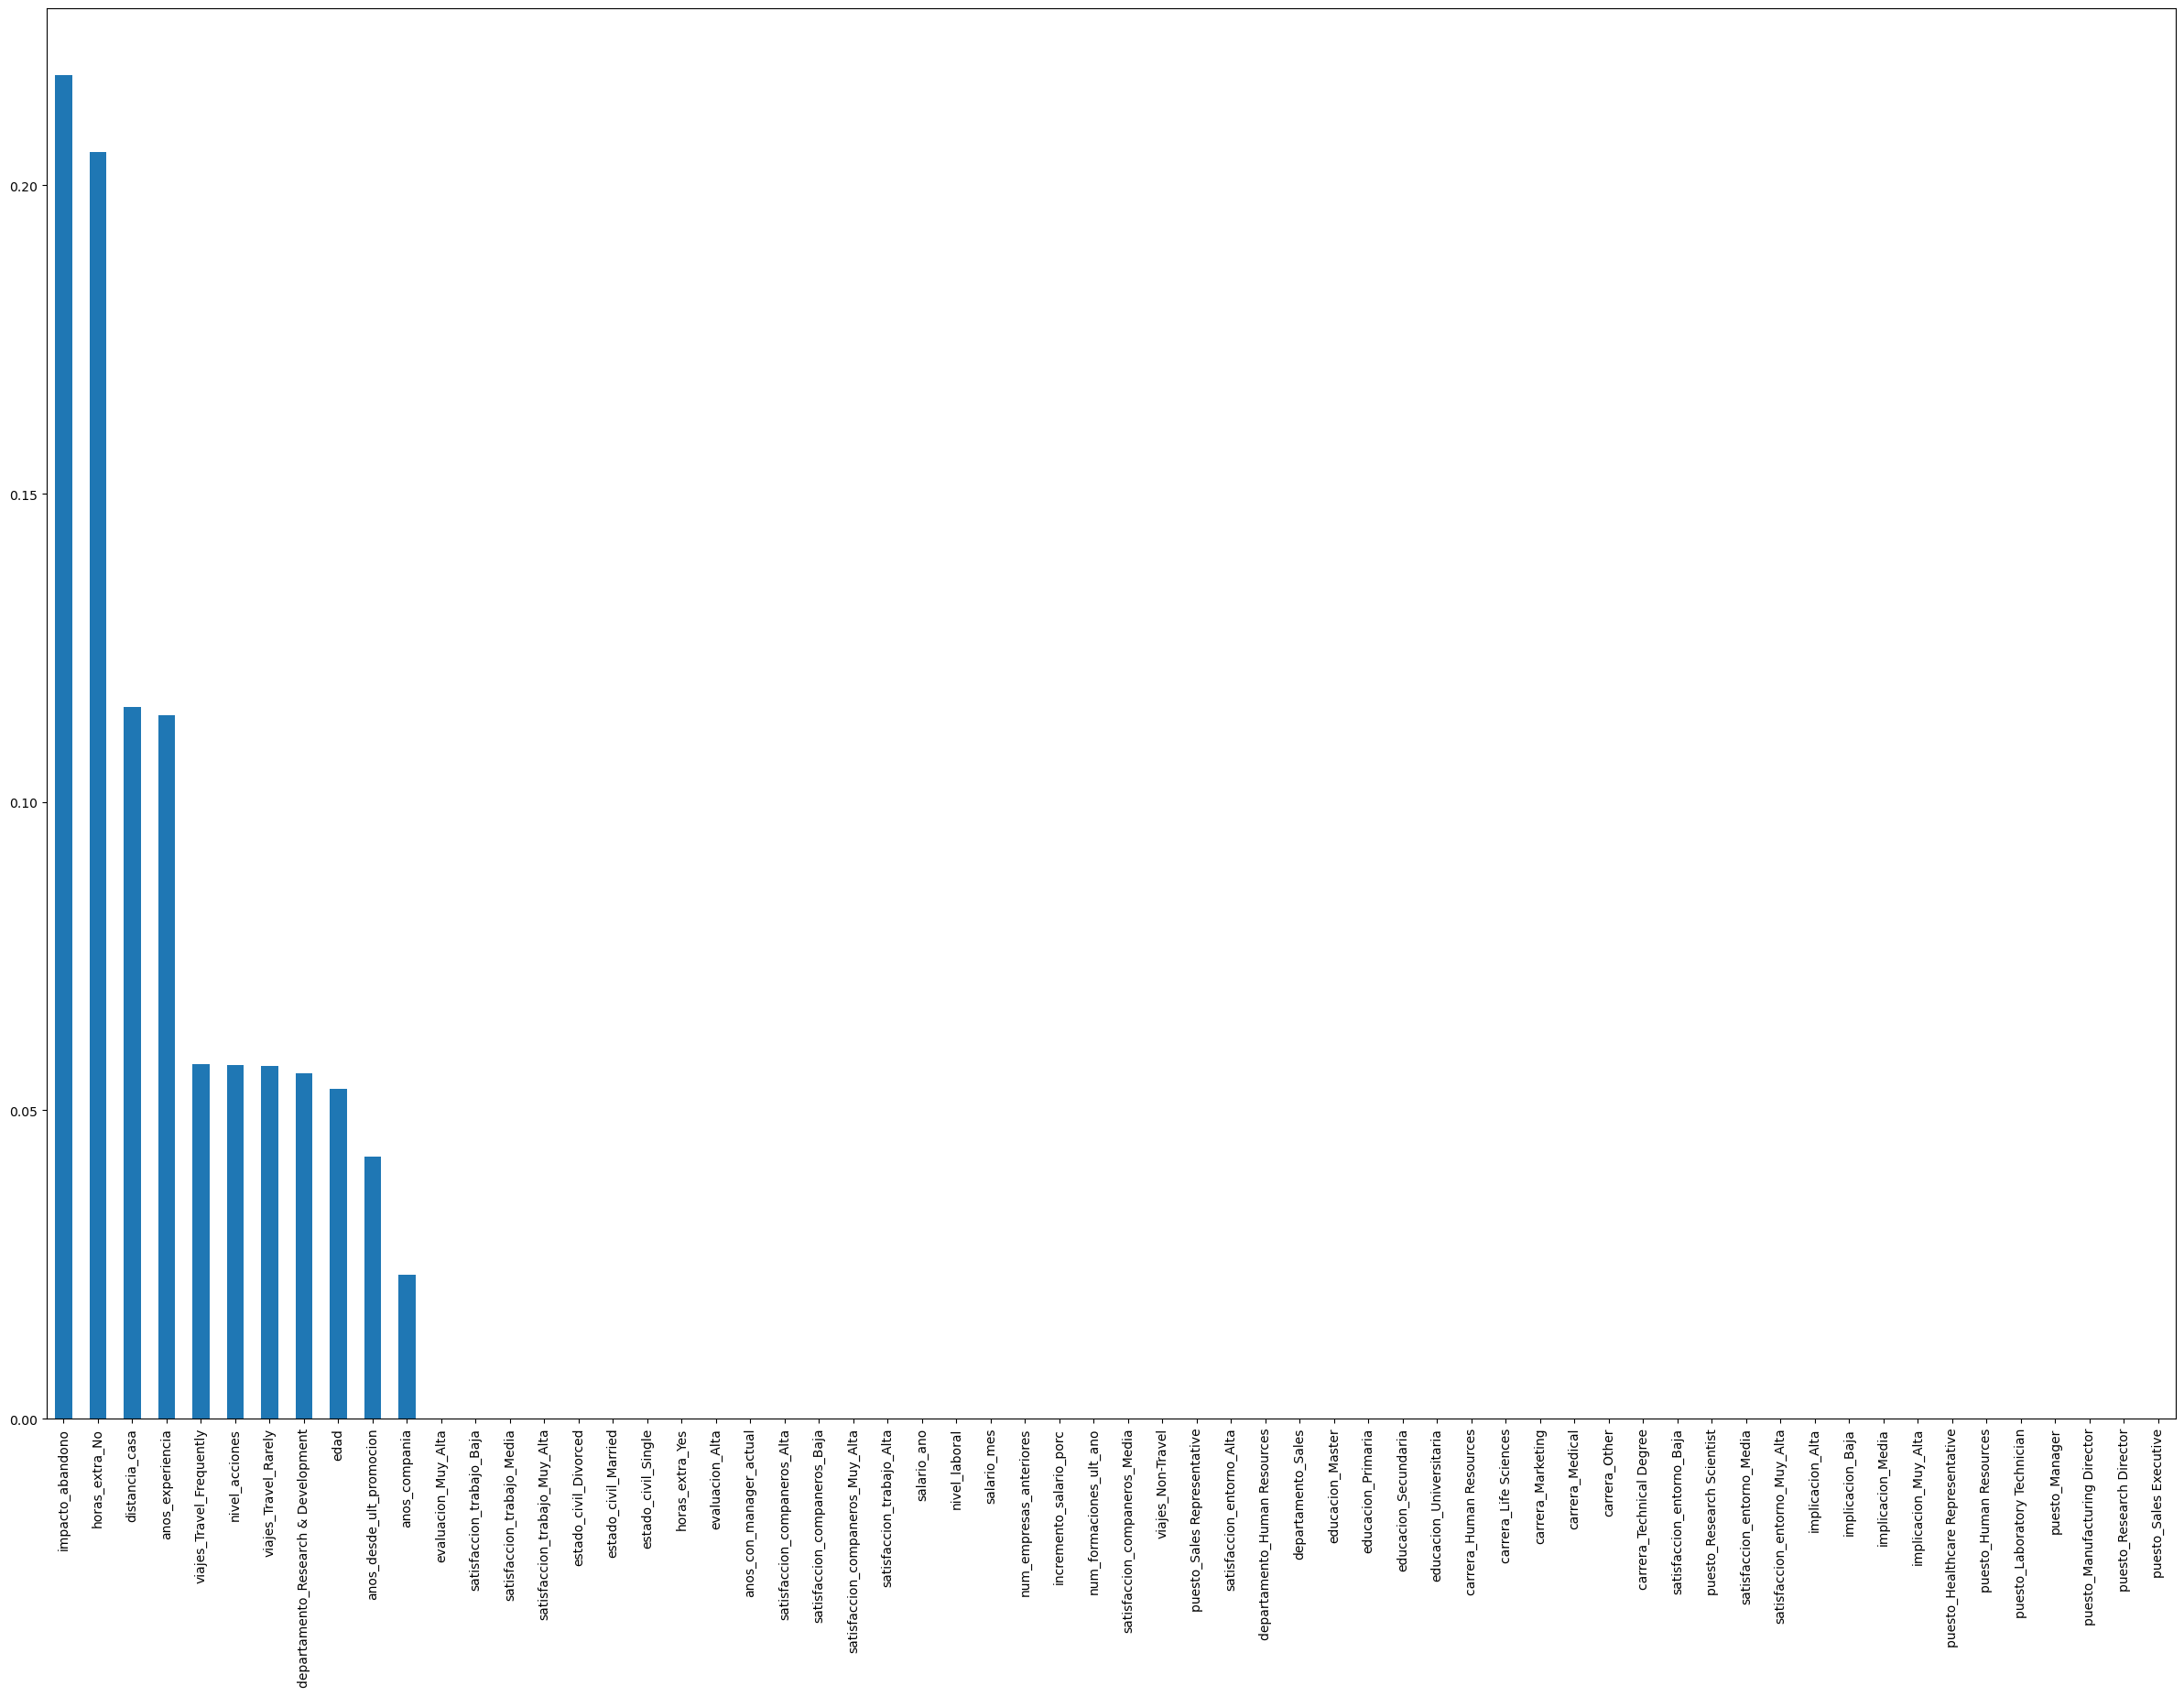

In [41]:
pd.Series(ad.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

In [42]:
#agregar variable al DF principal
df['scoring_abandono'] = ad.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1] #Predecir probabilidad. Drop sobre la x(var predict)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.101852
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.056235
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.380952
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.101852
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.056235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.090090
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.056235
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.056235


In [43]:
#10 empleados con mas probabilidad de abandonar la empresa
df.sort_values(by = 'scoring_abandono', ascending = False).head(20)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
2032,56,1,Travel_Rarely,Research & Development,7,Universitaria,Technical Degree,Muy_Alta,Alta,1,...,Muy_Alta,1,14,4,10,9,8,28068,4518.948,1.0
19,28,1,Travel_Rarely,Research & Development,24,Secundaria,Life Sciences,Alta,Media,1,...,Media,0,6,4,4,0,3,24336,3918.096,1.0
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,1.0
752,42,1,Travel_Frequently,Research & Development,19,Universitaria,Medical,Alta,Muy_Alta,1,...,Muy_Alta,0,7,2,2,2,2,33108,6522.276,1.0
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,1,3,1,0,0,25452,4097.772,1.0
1605,22,0,Non-Travel,Research & Development,26,Secundaria,Other,Media,Media,1,...,Media,0,4,2,4,1,3,33768,6652.296,1.0
1604,28,1,Travel_Rarely,Research & Development,24,Universitaria,Medical,Alta,Alta,1,...,Alta,3,1,3,1,0,0,28896,4652.256,1.0
911,32,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Alta,1,...,Alta,0,1,2,1,0,1,33540,6607.380,1.0
622,26,1,Travel_Rarely,Research & Development,24,Primaria,Technical Degree,Alta,Baja,1,...,Media,0,1,3,1,0,0,28080,4520.880,1.0


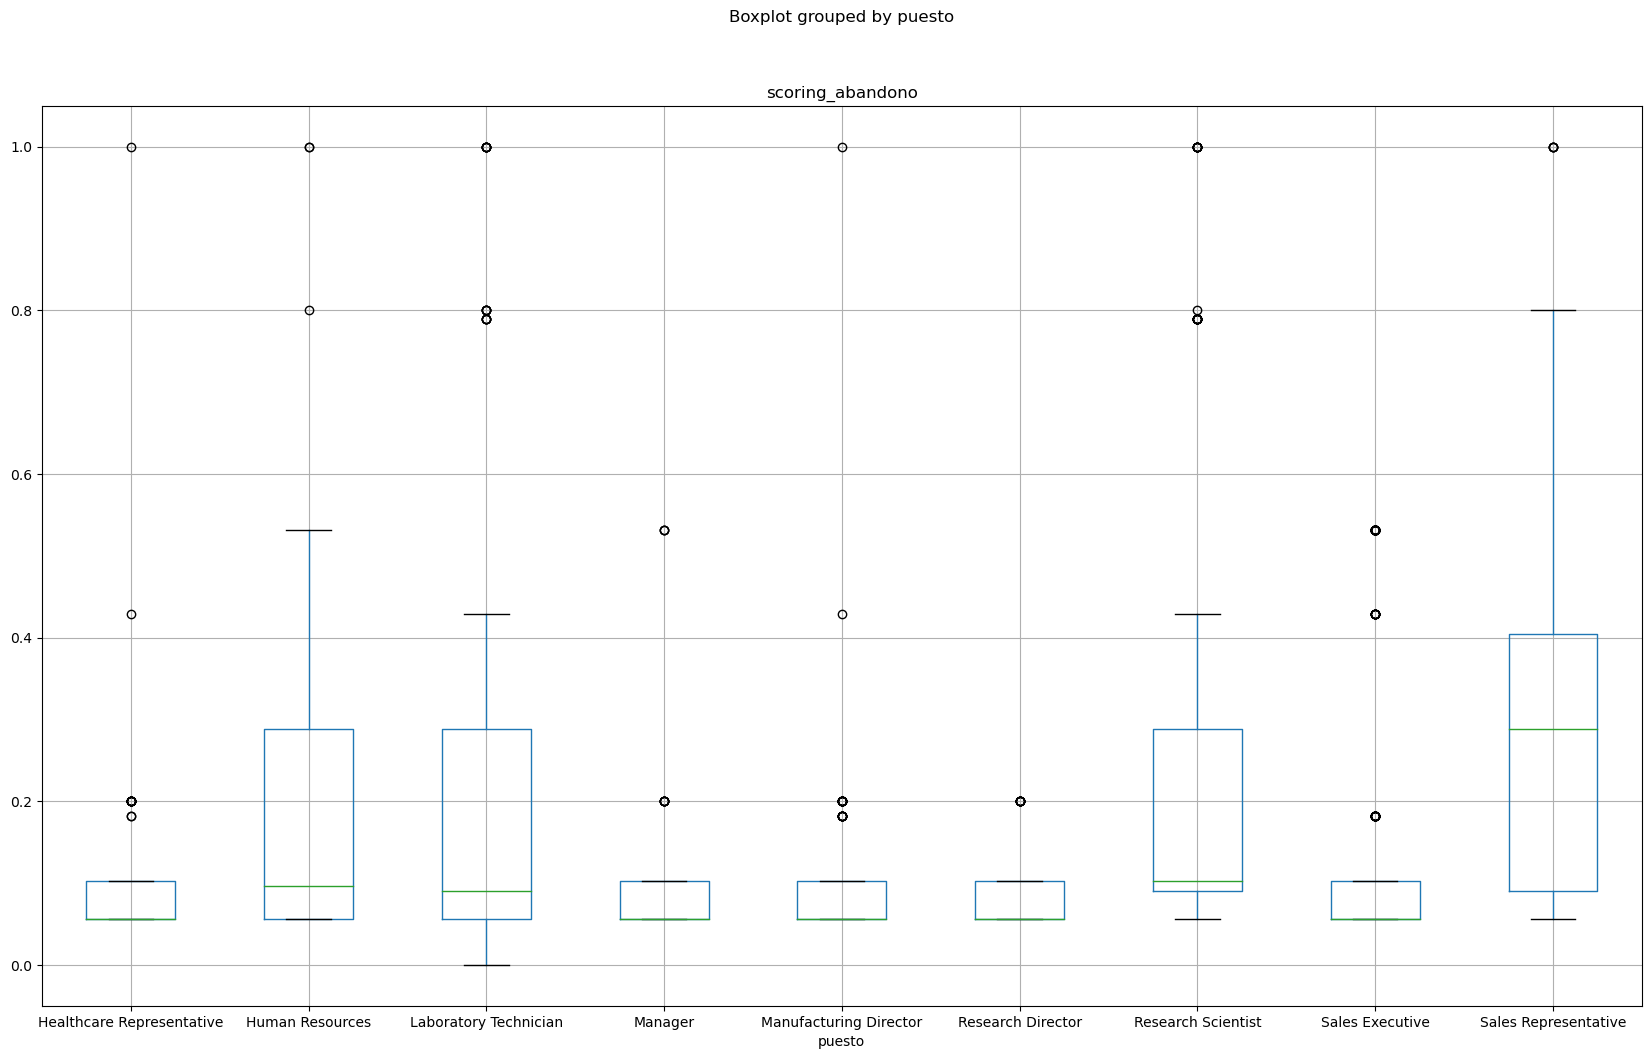

In [44]:
#riesgo de dejar la empresa por puesto de trabajo
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12)); #Y: 0 a 1 en abandono